In [7]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import KBinsDiscretizer

Our laplacian eigenmaps functions, namely laplacian_eigenmaps, avg_laplacian_eigenmaps, var_radius_std_laplacian_eigenmaps and var_radius_laplacian_eigenmaps are loaded from a separate file. More details about these eigenmaps functions can be found in the paper and in laplacian_eigenmaps_functions.ipynb

In [9]:
# Replace with your path to laplacian_eigenmaps_functions.ipynb
%run /Users/lucastucker/REU-2023/laplacian_eigenmaps_functions.ipynb

We will first test on 2 datasets, a swiss roll with color gradient and another swiss roll with color gradient and
also oversampling of the first color. 

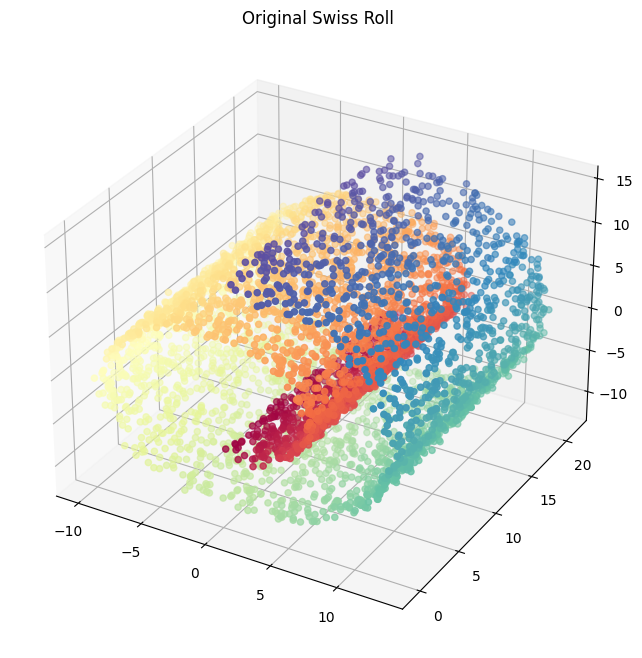

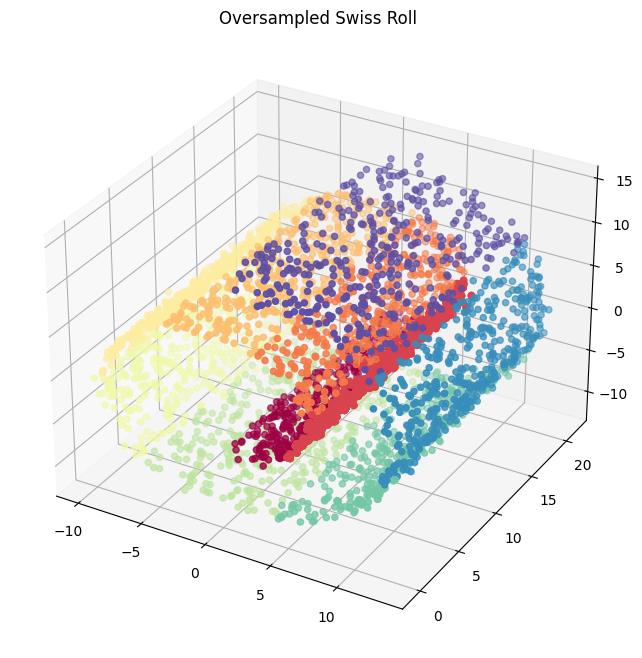

In [15]:
# Generate Swiss roll dataset
X, color = make_swiss_roll(n_samples=5000, noise=0.2, random_state=42)

# Visualize the original Swiss roll
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, color_train, color_test = train_test_split(X, color, test_size=0.2, random_state=42)

# Convert continuous labels to categorical labels
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
color_train_bins = est.fit_transform(color_train.reshape(-1, 1)).astype(int)

# Replace 'auto' with a numeric value (e.g., the mean of class counts)
oversample_strategy = {1: 2500, 2: int(np.mean(np.unique(color_train_bins, return_counts=True)[1]))}

# Oversample specific class
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
X_resampled, color_resampled = ros.fit_resample(X_train, color_train_bins.ravel())

# Visualize the oversampled Swiss roll
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_resampled[:, 0], X_resampled[:, 1], X_resampled[:, 2], c=color_resampled, cmap=plt.cm.Spectral)
ax.set_title("Oversampled Swiss Roll")
plt.show()


Let's perform standard LE (laplacian eigenmaps) to transform our data from 3 to 2 dimensions.

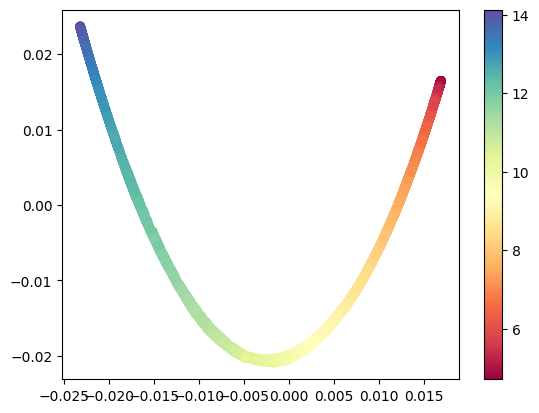

In [16]:
k = 2 # The reduced dimension size
sigma = 2 # Hyperparameter
t = 10 # Number of nearest neighbors measured

P = laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

The swiss roll is properly unravelled. As a control, let's apply our "variable radius" algorithm.

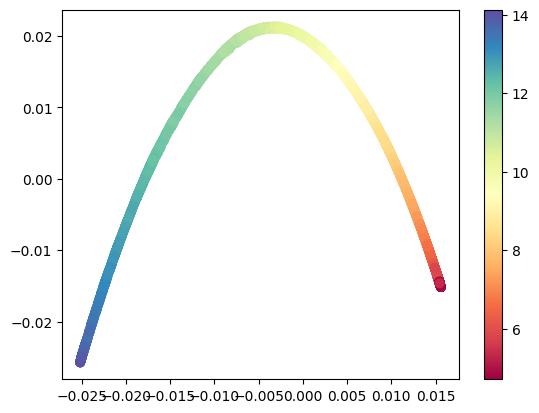

In [17]:
k = 2
max_rad = 18 # Feel free to adjust this

P = var_radius_std_laplacian_eigenmaps(X, k, max_rad)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

Again, the manifold is unravelled. Finally we test Jiang et. al's algorithm. 

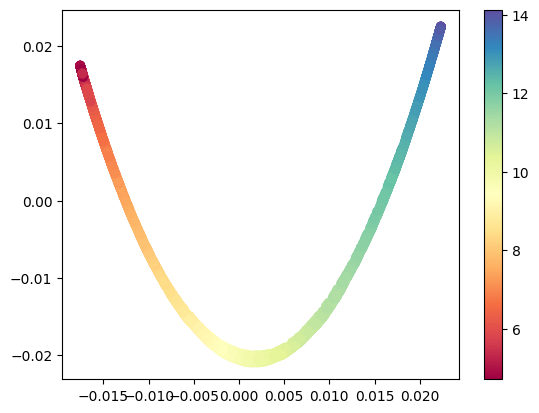

In [18]:
# Example usage
k = 2
t = 20

P = avg_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

Let's now test those same algorithms on the oversampled data. We start with standard LE.

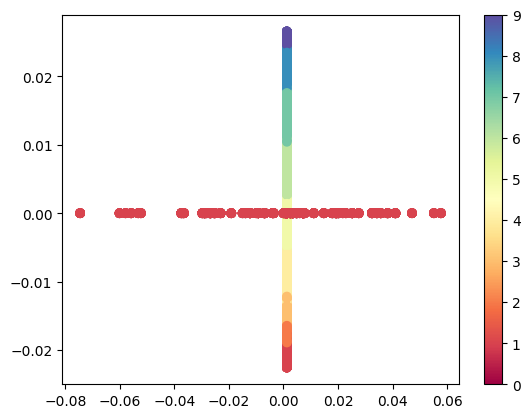

In [19]:
k = 2 # The reduced dimension size
sigma = 2 # Hyperparameter
t = 10 # Number of nearest neighbors measured

# Note we replace X and color with X_resampled and color_resampled, respectively
P = laplacian_eigenmaps(X_resampled, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color_resampled, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

As we can see, the manifold appears improperly unravelled. Let's try keeping the standard LE algorithm but now varying the "radius" of points. In particular, the LE weight matrix will only include r nearest neighbors for every point, where r (the radius) is increased if the point is in a denser area, and decreased if it is in a sparser area. 

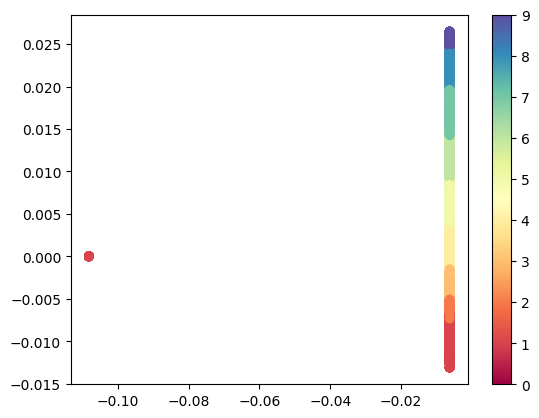

In [20]:
k = 2
max_rad = 18

P = var_radius_std_laplacian_eigenmaps(X_resampled, k, max_rad)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color_resampled, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

The dimension reduction appears more successful, with the color gradients relatively maintained. We will now implement the "averaged" LE proposed by Wang et. al. 

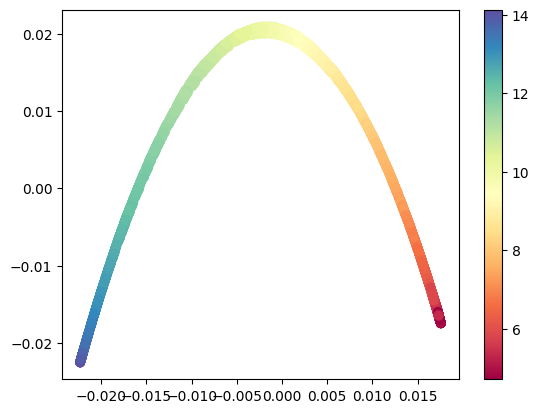

In [21]:
# Example usage
k = 2
t = 20

P = avg_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=color, cmap=plt.cm.Spectral)
fig.colorbar(sc)

plt.show()

Note that the shape of the previous graph is determined by the density-scaling in Jiang et. al's algorithm.

We now experiment with a helix dataset.  

In [ ]:
m = 1500 # number of points
n = 3 # representation dimension

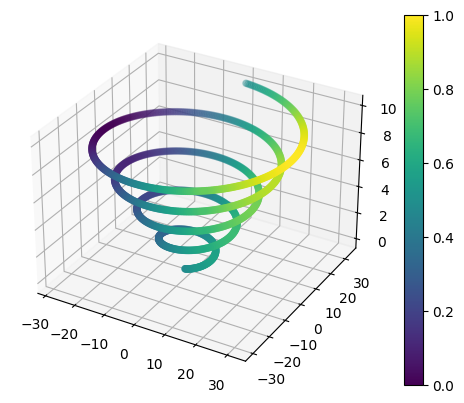

In [ ]:
theta = np.linspace(1.5 * np.pi, 10.5 * np.pi, m) # 1.5 to 4.5 default
r = np.linspace(0, 10, m)
x = theta * np.cos(theta)
z = r
y = theta * np.sin(theta)
# fig = plt.figure()
gradient_colors = x

# Normalize the gradient_colors to be between 0 and 1
min_color = np.min(gradient_colors)
max_color = np.max(gradient_colors)
normalized_colors = (gradient_colors - min_color) / (max_color - min_color)

# Create a colormap
colormap = cm.viridis

# Create an interpolated color gradient based on the normalized_colors
interpolated_colors = colormap(normalized_colors)

# Plot the original data points in 3D with the interpolated color gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=interpolated_colors)
fig.colorbar(sc)
plt.show()

In [ ]:
X = np.vstack((x, y, z)).T
X.shape

(1500, 3)

Let's perform standard LE on the dataset.

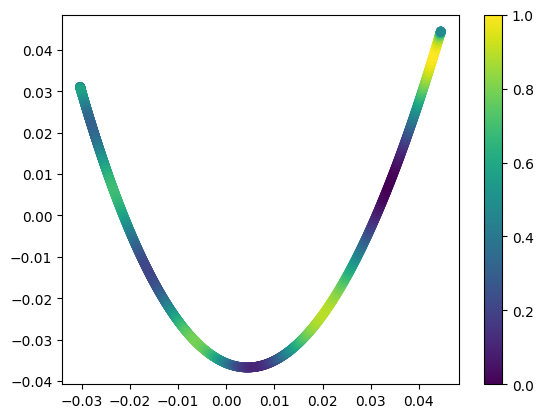

In [ ]:
k = 2
sigma = 2
t = 10

P = laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

The reduction is decent, but there is some overlap near the end. We now experiment with the "averaged LE" version proposed by Wang et. al.

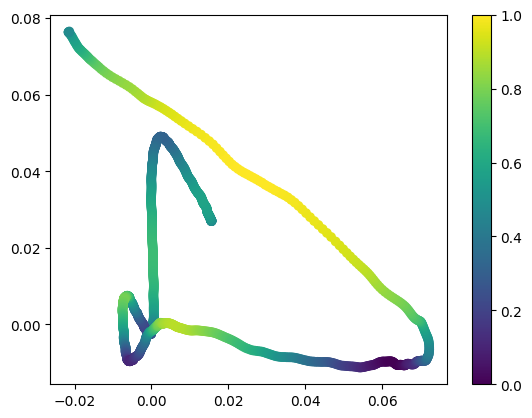

In [ ]:
k = 2
sigma = 2
t = 18

P = var_radius_std_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

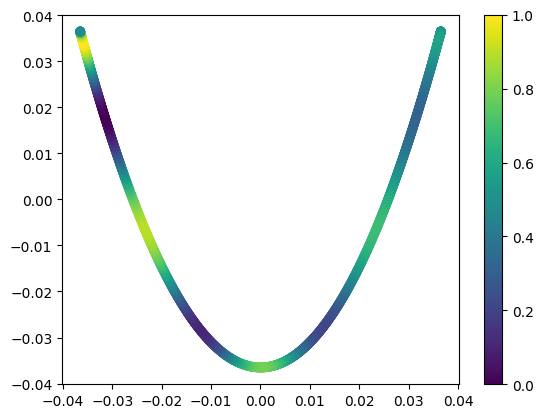

In [ ]:
k = 2
t = 10

P = avg_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()